In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [187]:
train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [188]:
train_data_new  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [189]:
train_data_new['ca'].value_counts()

0    119
1     45
2     27
3     17
4      4
Name: ca, dtype: int64

In [190]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [163]:
type(train_data_new['ca'])

pandas.core.series.Series

In [169]:
oh=LabelBinarizer()
transform=oh.fit_transform(train_data_new['ca'].astype('int64').to_numpy().reshape(-1,1))

In [182]:
categorical_cols[:-1]

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [183]:
ohe=OneHotEncoder(sparse=False)
transform_ohe=ohe.fit_transform(train_data_new[categorical_cols[:-1]].astype('int64'))

In [184]:
ohe.get_feature_names(categorical_cols[:-1])

array(['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'], dtype=object)

In [185]:
transform_ohe=pd.DataFrame(transform_ohe,columns=ohe.get_feature_names(categorical_cols[:-1]))

In [186]:
transform_ohe.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [170]:
transform

array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [173]:
oh.get_params()

{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}

In [174]:
ohe_df = pd.DataFrame(transform)

In [176]:
pd.get_dummies(train_data_new,columns=['ca'],drop_first=True).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target,ca_1,ca_2,ca_3,ca_4
0,48,1,2,124,255,1,1,175,0,0.0,2,2,1,0,1,0,0
1,68,0,2,120,211,0,0,115,0,1.5,1,2,1,0,0,0,0
2,46,1,0,120,249,0,0,144,0,0.8,2,3,0,0,0,0,0
3,60,1,0,130,253,0,1,144,1,1.4,2,3,0,1,0,0,0
4,43,1,0,115,303,0,1,181,0,1.2,1,2,1,0,0,0,0


In [175]:
ohe_df.head()

,0,1,2,3,4
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [191]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [192]:
train_df,valid_df=train_test_split(train_data,test_size=0.20,random_state=42,stratify=train_data['target'].values).copy()

In [193]:
train_df.reset_index(drop=True,inplace=True)
valid_df.reset_index(drop=True,inplace=True)

# Basic data analysis

Data Description

 

age: Age in years

sex: 1 = male, 0 = female

cp: Chest pain type

trestbps: Resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholesterol in mg/dl

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: Resting electrocardiographic results

thalach: Maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: The slope of the peak exercise ST segment

ca: Number of major vessels (0-4) colored by fluoroscopy

thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found

target: 1 = Heart disease present, 0 = Heart disease not present

In [194]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
1,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
2,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
3,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
4,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1


In [195]:
train_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [196]:
train_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,54.218935,0.680473,0.893491,132.408284,250.171598,0.171598,0.502959,149.704142,0.343195,1.029586,1.497041,0.816568,2.360947,0.544379
std,9.281606,0.467679,0.988273,17.632294,56.048025,0.378151,0.524680,23.111429,0.476187,1.189968,0.588827,1.100091,0.640788,0.499507
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,0.000000,153.000000,0.000000,0.600000,2.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,71.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [197]:
numerical_cols=[]
categorical_cols=[]
for val in train_df.columns:
  if train_df[val].nunique()<15:
    categorical_cols.append(val)
    print('The column {} is a categorical column'.format(val))
  else:
    numerical_cols.append(val)
    print('The column {} is a numerical column'.format(val))


The column age is a numerical column
The column sex is a categorical column
The column cp is a categorical column
The column trestbps is a numerical column
The column chol is a numerical column
The column fbs is a categorical column
The column restecg is a categorical column
The column thalach is a numerical column
The column exang is a categorical column
The column oldpeak is a numerical column
The column slope is a categorical column
The column ca is a categorical column
The column thal is a categorical column
The column target is a categorical column


In [198]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [199]:
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [200]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       169 non-null    int64  
 1   sex       169 non-null    int64  
 2   cp        169 non-null    int64  
 3   trestbps  169 non-null    int64  
 4   chol      169 non-null    int64  
 5   fbs       169 non-null    int64  
 6   restecg   169 non-null    int64  
 7   thalach   169 non-null    int64  
 8   exang     169 non-null    int64  
 9   oldpeak   169 non-null    float64
 10  slope     169 non-null    int64  
 11  ca        169 non-null    int64  
 12  thal      169 non-null    int64  
 13  target    169 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 18.6 KB


In [201]:
train_df['target'].value_counts()

1    92
0    77
Name: target, dtype: int64

The target column has little data imbalance. The data having heart disease is little more than the data doesn't have heart disease. We can use this information while building the model if required.

# EDA

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

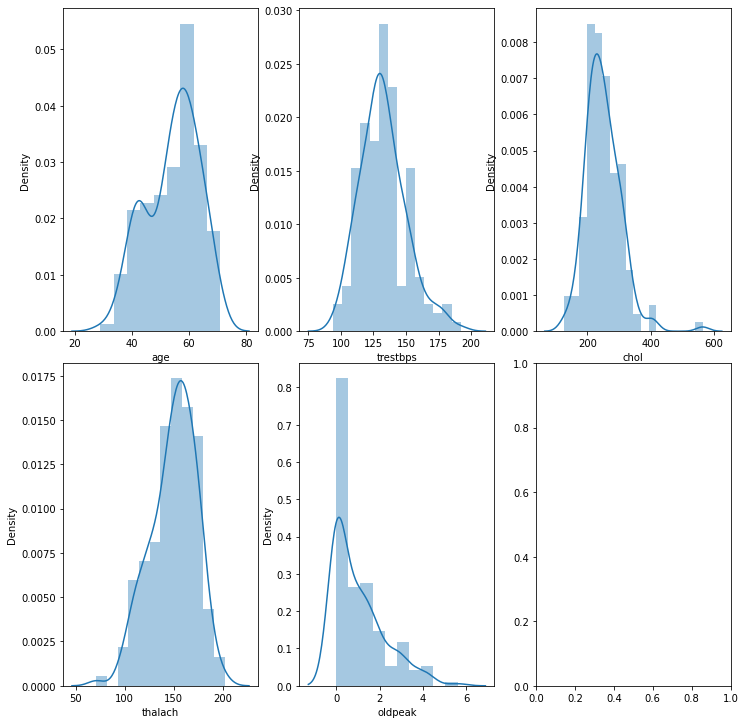

In [202]:
f, axes = plt.subplots(2, 3,figsize=(10,10))
f.tight_layout()
for i,val in enumerate(numerical_cols):
  sns.distplot(train_df[val],ax=axes[i//3][i%3])

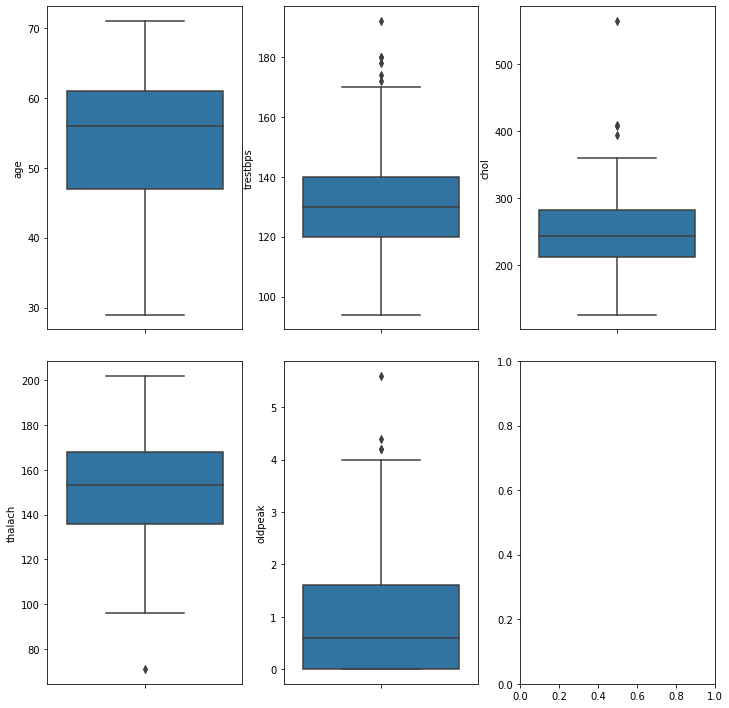

In [203]:
f, axes = plt.subplots(2, 3,figsize=(10,10))
f.tight_layout()
for i,val in enumerate(numerical_cols):
  sns.boxplot(y=train_df[val],ax=axes[i//3][i%3])

Age data follows normal distribution with slightly left skewed data. Age data does not have outliers. 

old peak is little right skewed whereas thalach has slightly left skewed distribution data.

Thalach,trestbps,oldpeak,chol have outliers

In [204]:
def WinsorizeCustom(data):
    quantiles = data.quantile([0.05, 0.95])
    q_05 = quantiles.loc[0.05]
    q_95 = quantiles.loc[0.95]

    out = np.where(data.values <= q_05,q_05, 
                                      np.where(data >= q_95, q_95, data)
                  )
    return out

In [205]:
for val in numerical_cols:
  train_df.loc[:,val]=WinsorizeCustom(train_df[val]).copy()
  valid_df.loc[:,val]=WinsorizeCustom(valid_df[val]).copy()
  test_data.loc[:,val]=WinsorizeCustom(test_data[val]).copy()
  train_data.loc[:,val]=WinsorizeCustom(train_data[val]).copy()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

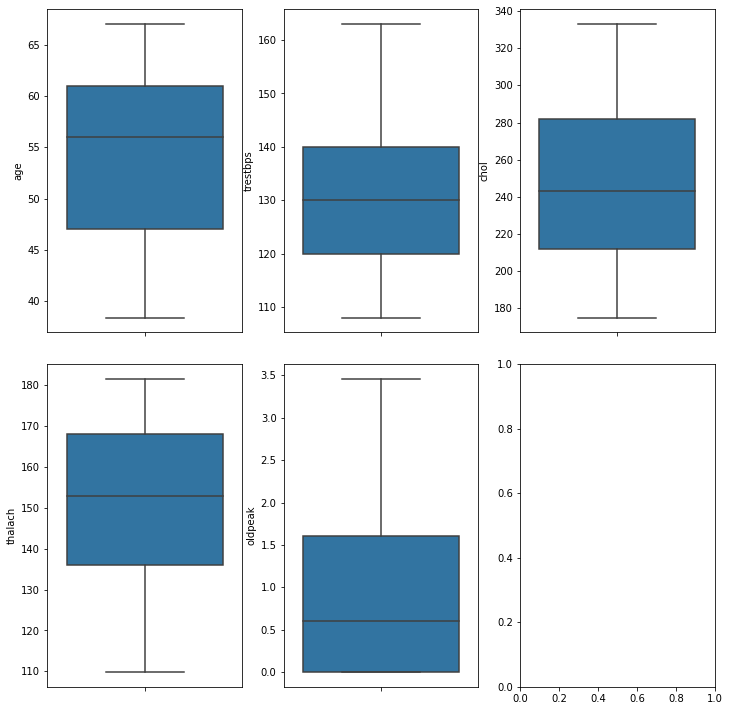

In [206]:
f, axes = plt.subplots(2, 3,figsize=(10,10))
f.tight_layout()
for i,val in enumerate(numerical_cols):
  sns.boxplot(y=train_df[val],ax=axes[i//3][i%3])

# Outliers are removed using winsorization

Among the age data that we have, we can split the age group into 4 groups. We can label that as young, medium, old, very-old and observe how each group gets affected by heart-disease 

In [207]:
#ser, bins = pd.qcut(df["A"], 20, retbins=True, labels=False)
ser,bins=pd.qcut(train_df['age'],4,retbins=True,labels=False)
bins

array([38.4, 47. , 56. , 61. , 67. ])

We can label the four groups as below

(28.999, 47.0] - young

(47.0, 56.0]   - medium

(56.0, 61.0]   - old

(61.0, 71.0]   - very old

In [208]:
train_df['age_bins']=pd.qcut(train_df['age'],q=4,labels=['young','medium','old','very_old'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
train_df['age_bins'].value_counts()

young       44
old         43
medium      42
very_old    40
Name: age_bins, dtype: int64

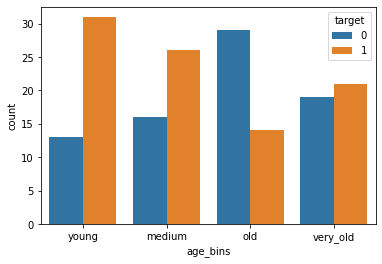

In [210]:
sns.countplot(x='age_bins',hue='target',data=train_df)

From the data, we can observe
The age group between 29-56 has more heart disease 
The age group between 56-61 has less number of heart disease compared to heart disease cases
The age group between 61-71 has almost equal number of both the classes

Not sure why we have less number of heart disease cases above 56, I searched in internet and indeed a recent study shows people ranging between 35 to 54 which matches our observation
https://www.heart.org/en/news/2018/11/12/heart-attacks-are-becoming-more-common-in-younger-people-especially-women#:~:text=The%20results%20showed%2030%20percent,32%20percent%20at%20the%20end.

In [211]:
temp_df=pd.crosstab(train_df['age_bins'],[train_df['sex'],train_df['target']])

In [212]:
temp_df

sex       0       1    
target    0   1   0   1
age_bins               
young     1   8  12  23
medium    2   9  14  17
old       8   6  21   8
very_old  6  14  13   7

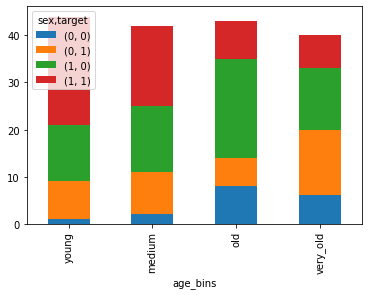

In [213]:
temp_df.plot.bar(stacked=True)
#plt.legend(title='mark')

According to data, very_old age group (61-71) have more female candidates suffering from heart disease and in the remaining age group we have more male candidates having heart disease.

In [214]:
train_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_bins'],
      dtype='object')

In [215]:
pd.qcut(train_df['trestbps'],4)

0      (107.999, 120.0]
1      (107.999, 120.0]
2        (120.0, 130.0]
3      (107.999, 120.0]
4        (140.0, 163.0]
             ...       
164      (120.0, 130.0]
165      (120.0, 130.0]
166    (107.999, 120.0]
167      (140.0, 163.0]
168      (130.0, 140.0]
Name: trestbps, Length: 169, dtype: category
Categories (4, interval[float64]): [(107.999, 120.0] < (120.0, 130.0] < (130.0, 140.0] < (140.0, 163.0]]

In [216]:
train_df['trestbps_bins']=pd.qcut(train_df['trestbps'],4,labels=['normal','elevated','hyper-stage1','hyper-stage2'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


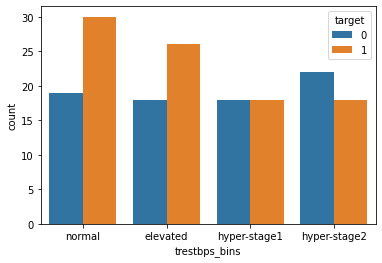

In [217]:
sns.countplot(x='trestbps_bins',hue='target',data=train_df)

The data indicates high bp level is not a single factor contributing to heart attack as we can see people having hyper-tension stage-2 i.e having bp higher than 140 surprisingly have less heart attacks and people having normal and elevated bp are more prone to heart diseases

# Chol

In [218]:
pd.qcut(train_df['chol'],5)

0      (255.8, 293.4]
1      (293.4, 333.0]
2      (293.4, 333.0]
3      (293.4, 333.0]
4      (205.2, 231.2]
            ...      
164    (205.2, 231.2]
165    (255.8, 293.4]
166    (205.2, 231.2]
167    (231.2, 255.8]
168    (293.4, 333.0]
Name: chol, Length: 169, dtype: category
Categories (5, interval[float64]): [(174.999, 205.2] < (205.2, 231.2] < (231.2, 255.8] < (255.8, 293.4] <
                                    (293.4, 333.0]]

In [219]:
train_df['chol_bins']=train_df['chol'].apply(lambda x: 'normal' if x<205 else 'border' if x<240 else 'dangerous')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


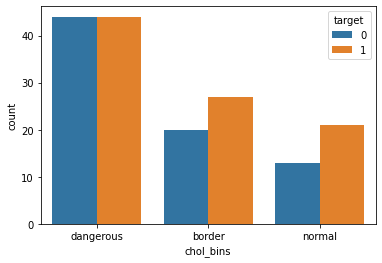

In [220]:
sns.countplot(x='chol_bins',hue='target',data=train_df)

High cholestral leads to high probability of heart disease as we can see if a person having chol above 240 (border and dangerous), then he/she have high probability of having a heart disease. 

In [221]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

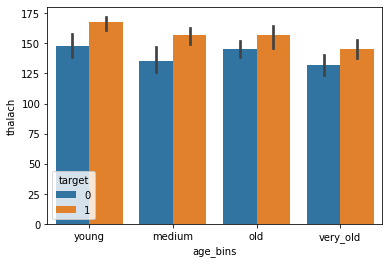

In [222]:
sns.barplot(x='age_bins',y='thalach',hue='target',data=train_df)

From the above graph, we can see people who have more than 150 heart beat is more probable to have a heart disease

# Categorical columns

In [223]:
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

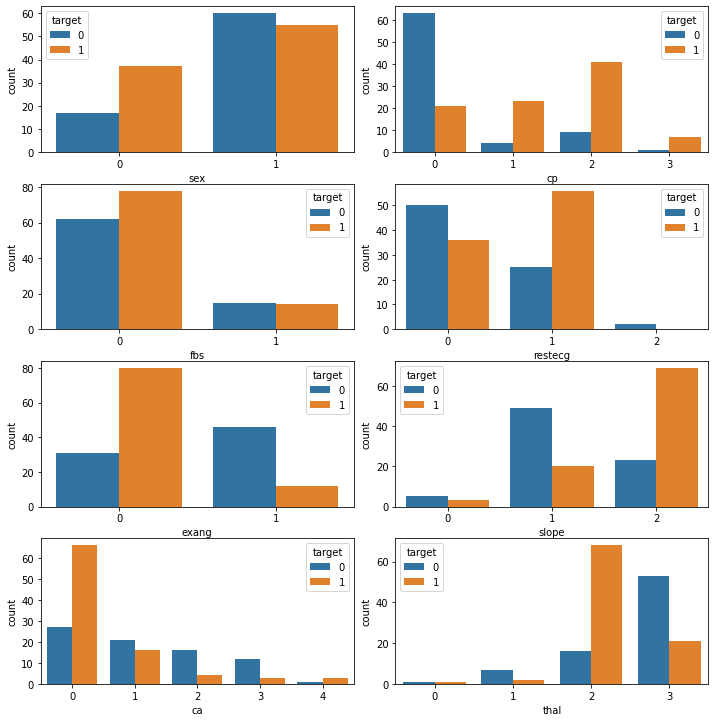

In [224]:
f, axes = plt.subplots(4,2,figsize=(10,10))
f.tight_layout()
for i,val in enumerate(categorical_cols[:-1]):
  sns.countplot(x=val,data=train_df,hue='target',ax=axes[i//2][i%2])

Female having slightly higher probability to get heart disease than male

CP-level > 0 have high chances of getting heart disease. I assume chest-pain type 0 might be normal or mild one and higher level (2) indicates severe chest pain

fbs - fast blood sugar level > 120 mg  - According to data, it doesn't contribute much to detecting heart disease as we have less number of people having fbs >120 have heart disease

restecg: Resting electrocardiographic results - values>0 have high probability of getting heart disease. In the train data for the category restecg having value 2 we donot have a single heart disease patient. We can convert that category to 1

exang: Exercise induced angina (1 = yes; 0 = no) - if a person doesnot have a exercise induced angina then he/she have a less probability of getting heart disease according to the data.


slope ( The slope of the peak exercise ST segment): Increase in slope value increases the chance of having heart disease

ca: Number of major vessels (0-4) colored by fluoroscopy: ca and probability of getting heart disease are almost inversely proportional


thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found : Strangely according to data people having normal blood level having high heart rate. The reason which i can think of is that thal feature is not an independent contributor to the heart disease



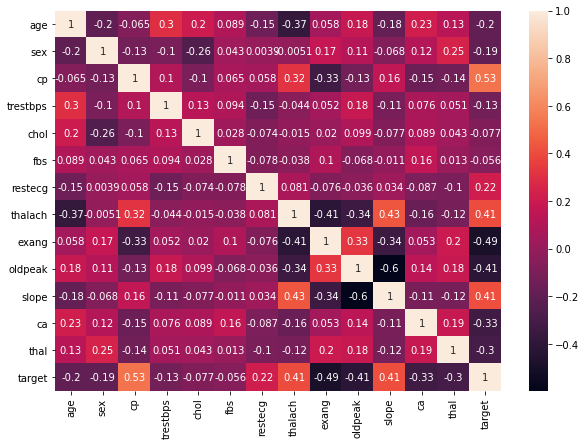

In [225]:
plt.figure(figsize=(10,7))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [226]:
from scipy.stats import chi2_contingency

In [227]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

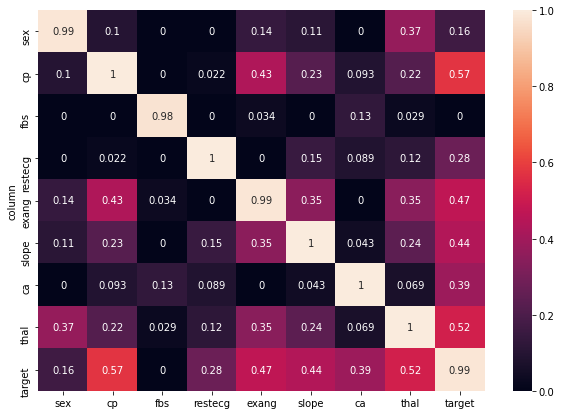

In [228]:
cramers=pd.DataFrame({i:[cramers_v(train_df[i],train_df[j]) for j in categorical_cols] for i in categorical_cols})
cramers['column']=[i for i in categorical_cols ]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

target column seems to have positive correlation with cp, exang, slope, thal features

#cp

In [229]:
def chisquare_test(df,colX,colY,alpha=0.05):
   X = df[colX].astype(str)
   Y = df[colY].astype(str)
   dfObserved = pd.crosstab(Y,X) 
   chi2, p, dof, expected = chi2_contingency(dfObserved.values)
   if p<alpha: # Null hypothesis (Both columns are independent)
       print("{0} is IMPORTANT for Prediction".format(colX))
   else: # Alternate hypothesis
       print("{0} is not IMPORTANT for Prediction and can be discarded".format(colX))
        

In [230]:
X = train_df.drop(['target'], axis=1)
#ct = ChiSquare(df)
for c in X.columns:
    chisquare_test(train_df, c,'target')

age is not IMPORTANT for Prediction and can be discarded
sex is IMPORTANT for Prediction
cp is IMPORTANT for Prediction
trestbps is not IMPORTANT for Prediction and can be discarded
chol is not IMPORTANT for Prediction and can be discarded
fbs is not IMPORTANT for Prediction and can be discarded
restecg is IMPORTANT for Prediction
thalach is not IMPORTANT for Prediction and can be discarded
exang is IMPORTANT for Prediction
oldpeak is IMPORTANT for Prediction
slope is IMPORTANT for Prediction
ca is IMPORTANT for Prediction
thal is IMPORTANT for Prediction
age_bins is IMPORTANT for Prediction
trestbps_bins is not IMPORTANT for Prediction and can be discarded
chol_bins is not IMPORTANT for Prediction and can be discarded


According to chisquare, we have age, trestbps, chol, thalach feature are not important contributor to predicting heart disease. Let's analyse this result at the end

In [231]:
train_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_bins',
       'trestbps_bins', 'chol_bins'],
      dtype='object')

In [232]:
#train_df['restecg']=train_df['restecg'].apply(lambda x: 1.0 if x>1 else x).astype('int64')

In [233]:
#valid_df['restecg']=valid_df['restecg'].apply(lambda x: 1.0 if x>1 else x).astype('int64')
#test_data['restecg']=test_data['restecg'].apply(lambda x: 1.0 if x>1 else x).astype('int64')

In [234]:
valid_df['restecg'].value_counts()

1    27
0    15
2     1
Name: restecg, dtype: int64

In [235]:
ohe=OneHotEncoder(sparse=False)

In [236]:
ohe.fit(train_df[categorical_cols[:-1]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [250]:
def convert_categorical_columns(df,ohe,categorical_cols):
  temp_df=ohe.transform(df[categorical_cols])
  temp_df=pd.DataFrame(temp_df,columns=ohe.get_feature_names(categorical_cols))
  df=pd.concat([df, temp_df], axis=1).drop(categorical_cols, axis=1)
  return df


In [242]:
train_df=convert_categorical_columns(train_df,ohe,categorical_cols[:-1])

In [47]:
#train_df=pd.get_dummies(train_df,columns=categorical_cols[:-1],drop_first=True)

In [48]:
train_df.head()

,age,trestbps,chol,thalach,oldpeak,target,age_bins,trestbps_bins,chol_bins,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,42.0,108.0,265.0,122.0,0.60,1,young,normal,dangerous,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,58.0,114.0,318.0,140.0,3.46,0,old,normal,dangerous,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,63.0,130.0,330.0,132.0,1.80,0,very_old,elevated,dangerous,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
3,60.0,108.0,318.0,160.0,0.00,1,old,normal,dangerous,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,66.0,160.0,228.0,138.0,2.30,1,very_old,hyper-stage2,border,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [49]:
train_df.head()

,age,trestbps,chol,thalach,oldpeak,target,age_bins,trestbps_bins,chol_bins,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,42.0,108.0,265.0,122.0,0.60,1,young,normal,dangerous,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,58.0,114.0,318.0,140.0,3.46,0,old,normal,dangerous,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,63.0,130.0,330.0,132.0,1.80,0,very_old,elevated,dangerous,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
3,60.0,108.0,318.0,160.0,0.00,1,old,normal,dangerous,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,66.0,160.0,228.0,138.0,2.30,1,very_old,hyper-stage2,border,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [243]:
train_df_1=train_df.copy()
valid_df_1=valid_df.copy()
test_data_1=test_data.copy()

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
autoscaler = StandardScaler()
train_df[numerical_cols] = autoscaler.fit_transform(train_df[numerical_cols])

In [246]:
valid_df[numerical_cols] = autoscaler.transform(valid_df[numerical_cols])
test_data[numerical_cols] = autoscaler.fit_transform(test_data[numerical_cols])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [248]:
valid_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.112795,1,0,0.839692,-0.804647,0,0,-0.847464,0,0.924517,1,2,1,0
1,-0.598522,1,1,-0.133614,0.396598,0,1,1.001105,0,-0.360983,2,0,2,1
2,-1.054873,1,3,-1.431354,0.352107,0,1,-0.847464,0,0.189945,1,0,3,0
3,-0.484434,1,2,-0.198501,-1.160572,0,1,0.621911,0,-0.911912,2,0,2,1
4,-0.826698,1,0,-1.431354,0.596805,0,0,-1.511053,1,0.006303,1,1,2,0


In [249]:
ohe.transform(valid_df[categorical_cols[:-1]])

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [251]:
valid_df=convert_categorical_columns(valid_df,ohe,categorical_cols[:-1])
test_data=convert_categorical_columns(test_data,ohe,categorical_cols[:-1])

In [252]:
train_df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'age_bins',
       'trestbps_bins', 'chol_bins', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2',
       'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1',
       'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [253]:
valid_df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [54]:
#valid_df=pd.get_dummies(valid_df,columns=categorical_cols[:-1],drop_first=True)
#test_data=pd.get_dummies(test_data,columns=categorical_cols[:-1],drop_first=True)


In [254]:
valid_df_1=convert_categorical_columns(valid_df_1,ohe,categorical_cols[:-1])
test_data_1=convert_categorical_columns(test_data_1,ohe,categorical_cols[:-1])

In [255]:
#valid_df_1=pd.get_dummies(valid_df_1,columns=categorical_cols[:-1],drop_first=True)
#test_data_1=pd.get_dummies(test_data_1,columns=categorical_cols[:-1],drop_first=True)

In [256]:
train_df.head()

,age,trestbps,chol,thalach,oldpeak,target,age_bins,trestbps_bins,chol_bins,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-1.397136,-1.561128,0.374352,-1.321456,-0.360983,1,young,normal,dangerous,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.428268,-1.171806,1.553352,-0.468271,2.265110,0,old,normal,dangerous,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.998707,-0.133614,1.820295,-0.847464,0.740874,0,very_old,elevated,dangerous,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.656443,-1.561128,1.553352,0.479714,-0.911912,1,old,normal,dangerous,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.340970,1.812997,-0.448723,-0.563069,1.199981,1,very_old,hyper-stage2,border,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [257]:
X_train=train_df.drop(['target','age_bins','trestbps_bins','chol_bins'],axis=1)
y_train=train_df['target']

In [258]:
X_train_1=train_df_1.drop(['target','age_bins','trestbps_bins','chol_bins'],axis=1)
y_train_1=train_df_1['target']

In [259]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-1.397136,-1.561128,0.374352,-1.321456,-0.360983,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.428268,-1.171806,1.553352,-0.468271,2.265110,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.998707,-0.133614,1.820295,-0.847464,0.740874,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.656443,-1.561128,1.553352,0.479714,-0.911912,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.340970,1.812997,-0.448723,-0.563069,1.199981,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [260]:
X_valid=valid_df.drop(['target'],axis=1)
y_valid=valid_df['target']

In [261]:
#missing_cols_valid = set( X_train.columns ) - set(X_valid.columns )

In [262]:
#missing_cols_valid

set()

In [263]:
X_valid_1=valid_df_1.drop(['target'],axis=1)
y_valid_1=valid_df_1['target']

In [264]:
'''for c in missing_cols_valid:
    X_valid[c] = 0
    X_valid_1[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_valid = X_valid[X_train.columns]
X_valid_1 = X_valid_1[X_train.columns]'''

'for c in missing_cols_valid:\n    X_valid[c] = 0\n    X_valid_1[c] = 0\n# Ensure the order of column in the test set is in the same order than in train set\nX_valid = X_valid[X_train.columns]\nX_valid_1 = X_valid_1[X_train.columns]'

In [265]:
#missing_cols_test = set( X_train.columns ) - set(test_data.columns )

In [266]:
'''for c in missing_cols_test:
    test_data[c] = 0
    test_data_1[c]=0
# Ensure the order of column in the test set is in the same order than in train set
test_data = test_data[X_train.columns]
test_data_1 = test_data_1[X_train.columns]'''

'for c in missing_cols_test:\n    test_data[c] = 0\n    test_data_1[c]=0\n# Ensure the order of column in the test set is in the same order than in train set\ntest_data = test_data[X_train.columns]\ntest_data_1 = test_data_1[X_train.columns]'

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost
import lightgbm
from sklearn.neighbors import KNeighborsClassifier



In [268]:
from sklearn.utils.class_weight import compute_class_weight

In [269]:
compute_class_weight('balanced',np.unique(y_train),y_train,)

array([1.0974026 , 0.91847826])

In [270]:
class_weight={0:1.0974026,1:0.91847826}

In [475]:
lr=LogisticRegression(max_iter=1000,random_state=1,solver='newton-cg',
...                          multi_class='multinomial')

In [476]:
svm_classifier=SVC(random_state=1,gamma=0.1, C=1.0)
Dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1,n_estimators=400,max_depth=10)
xgb=xgboost.XGBClassifier(random_state=1)
lgb=lightgbm.LGBMClassifier(random_state=1)
knn_clf = KNeighborsClassifier()


In [477]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [478]:
Dt.fit(X_train_1,y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [479]:
rf.fit(X_train_1,y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [480]:
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [481]:
xgb.fit(X_train_1,y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [482]:
lgb.fit(X_train_1,y_train_1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [483]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [484]:
from sklearn.metrics import f1_score, accuracy_score,classification_report,confusion_matrix

In [485]:
def print_results(model,X,y,name='model'):
  print('The accuracy of the {} is {}'.format(name,accuracy_score(y,model.predict(X))))
  print('The F1 score of the {} is {}'.format(name,f1_score(y,model.predict(X))))
  print('The confusion matrix of the model {} is {}'.format(name,confusion_matrix(y,model.predict(X))))

In [486]:
print_results(lr,X_valid,y_valid,'logistic_regression_model')

The accuracy of the logistic_regression_model is 0.7674418604651163
The F1 score of the logistic_regression_model is 0.7999999999999999
The confusion matrix of the model logistic_regression_model is [[13  7]
 [ 3 20]]


In [487]:
print_results(Dt,X_valid_1,y_valid_1,'Decision_tree_model')

The accuracy of the Decision_tree_model is 0.7441860465116279
The F1 score of the Decision_tree_model is 0.7755102040816326
The confusion matrix of the model Decision_tree_model is [[13  7]
 [ 4 19]]


In [488]:
print_results(rf,X_valid_1,y_valid_1,'random_forest_model')

The accuracy of the random_forest_model is 0.7906976744186046
The F1 score of the random_forest_model is 0.8235294117647057
The confusion matrix of the model random_forest_model is [[13  7]
 [ 2 21]]


In [489]:
print_results(svm_classifier,X_valid,y_valid,'svm_model')

The accuracy of the svm_model is 0.8372093023255814
The F1 score of the svm_model is 0.8627450980392156
The confusion matrix of the model svm_model is [[14  6]
 [ 1 22]]


In [490]:
print_results(xgb,X_valid_1,y_valid_1,'xgboost_model')

The accuracy of the xgboost_model is 0.7209302325581395
The F1 score of the xgboost_model is 0.76
The confusion matrix of the model xgboost_model is [[12  8]
 [ 4 19]]


In [491]:
print_results(lgb,X_valid_1,y_valid_1,'lightgbm_model')

The accuracy of the lightgbm_model is 0.7441860465116279
The F1 score of the lightgbm_model is 0.7755102040816326
The confusion matrix of the model lightgbm_model is [[13  7]
 [ 4 19]]


In [492]:
print_results(knn_clf,X_valid,y_valid,'k-nearest-neighbor')

The accuracy of the k-nearest-neighbor is 0.7906976744186046
The F1 score of the k-nearest-neighbor is 0.8163265306122449
The confusion matrix of the model k-nearest-neighbor is [[14  6]
 [ 3 20]]


In [493]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()

In [494]:
naive_bayes.fit(X_train_1,y_train_1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [495]:
print_results(naive_bayes,X_valid_1,y_valid_1,'naive_bayes')

The accuracy of the naive_bayes is 0.813953488372093
The F1 score of the naive_bayes is 0.84
The confusion matrix of the model naive_bayes is [[14  6]
 [ 2 21]]


In [496]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

In [497]:
lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters: {'C': 4.281332398719396, 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [498]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-1.397136,-1.561128,0.374352,-1.321456,-0.360983,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.428268,-1.171806,1.553352,-0.468271,2.265110,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.998707,-0.133614,1.820295,-0.847464,0.740874,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.656443,-1.561128,1.553352,0.479714,-0.911912,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.340970,1.812997,-0.448723,-0.563069,1.199981,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [499]:
X_valid.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1.112795,0.839692,-0.804647,-0.847464,0.924517,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.598522,-0.133614,0.396598,1.001105,-0.360983,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.054873,-1.431354,0.352107,-0.847464,0.189945,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.484434,-0.198501,-1.160572,0.621911,-0.911912,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.826698,-1.431354,0.596805,-1.511053,0.006303,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [500]:
print_results(lr_clf,X_valid,y_valid,name='Logistic-regression')

The accuracy of the Logistic-regression is 0.7674418604651163
The F1 score of the Logistic-regression is 0.7999999999999999
The confusion matrix of the model Logistic-regression is [[13  7]
 [ 3 20]]


In [445]:
train_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))

Maximum KNN score on the test data: 100.00%


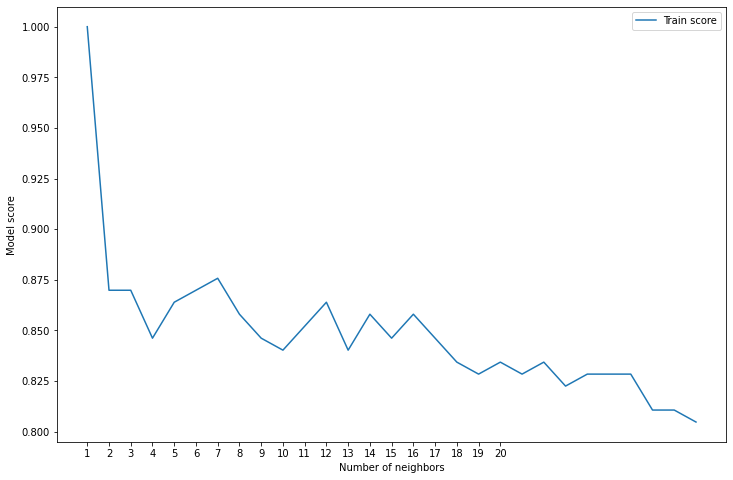

In [446]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [447]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [448]:
print_results(knn_clf,X_valid,y_valid,name='k-nearest-neighbor')

The accuracy of the k-nearest-neighbor is 0.7674418604651163
The F1 score of the k-nearest-neighbor is 0.7916666666666667
The confusion matrix of the model k-nearest-neighbor is [[14  6]
 [ 4 19]]


In [501]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0,class_weight={0:1.05,1:1})

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:    2.7s


Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 732 out of 735 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    3.0s finished


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [502]:
print_results(svm_clf,X_valid,y_valid,name='svm')

The accuracy of the svm is 0.8372093023255814
The F1 score of the svm is 0.8627450980392156
The confusion matrix of the model svm is [[14  6]
 [ 1 22]]


In [503]:
Dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [504]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42,class_weight={0:1.2,1:1})
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train_1, y_train_1)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_1, y_train_1)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   16.4s


Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   37.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [505]:
tree_clf.class_weight={0:1.1,1:1}

In [506]:
tree_clf.fit(X_train_1,y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1.1, 1: 1},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='random')

In [507]:
print_results(tree_clf,X_valid_1,y_valid_1,name='Decision-tree')

The accuracy of the Decision-tree is 0.7674418604651163
The F1 score of the Decision-tree is 0.7999999999999999
The confusion matrix of the model Decision-tree is [[13  7]
 [ 3 20]]


In [348]:
res_1=pd.DataFrame()

In [508]:
res_1['lr']=lr.predict(X_valid)

res_1['svm']=svm_classifier.predict(X_valid)
res_1['Dt']=tree_clf.predict(X_valid_1)
res_1['xgb']=xgb.predict(X_valid_1)
res_1['lgb']=lgb.predict(X_valid_1)
res_1['knn']=knn_clf.predict(X_valid)
res_1['naive_bayes']=naive_bayes.predict(X_valid_1)

In [509]:
res_1['rf']=rf.predict(X_valid_1)

In [510]:
res_1['True']=y_valid

In [511]:
res_1['final']=(res_1['lr']+res_1['rf']+res_1['svm']+res_1['Dt']+res_1['xgb']+res_1['lgb']+res_1['knn']+res_1['naive_bayes'])/8 - res_1['True']

In [512]:
res_1['prediction']=(res_1['lr']+2*res_1['rf']+2*res_1['svm']+res_1['Dt']+res_1['xgb']+res_1['lgb']+2*res_1['knn']+2*res_1['naive_bayes'])/12

In [513]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [514]:
X_valid.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1.112795,0.839692,-0.804647,-0.847464,0.924517,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.598522,-0.133614,0.396598,1.001105,-0.360983,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.054873,-1.431354,0.352107,-0.847464,0.189945,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.484434,-0.198501,-1.160572,0.621911,-0.911912,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.826698,-1.431354,0.596805,-1.511053,0.006303,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [515]:
res_1.loc[res_1['final']!=0]

,lr,svm,Dt,xgb,lgb,knn,naive_bayes,rf,True,final,prediction
2,1,1,1,1,1,1,1,1,0,1.000,1.000000
5,1,1,0,1,1,1,1,1,1,-0.125,0.916667
6,1,1,1,1,1,1,1,1,0,1.000,1.000000
12,1,1,1,1,1,1,1,1,0,1.000,1.000000
14,1,1,1,0,0,1,1,1,1,-0.250,0.833333
17,0,0,0,0,0,0,0,0,1,-1.000,0.000000
18,0,0,1,1,0,0,0,0,0,0.250,0.166667
20,1,1,1,1,1,1,1,1,0,1.000,1.000000
24,1,1,1,1,1,0,1,1,0,0.875,0.833333
25,0,1,1,1,1,1,1,1,1,-0.125,0.916667


In [516]:
res_1['prediction']=res_1['prediction'].apply(lambda x: 1.0 if x>0.5 else 0.0)

In [517]:
f1_score(res_1['True'],res_1['prediction'])

0.84

In [518]:
res=pd.DataFrame()


In [519]:
res['lr']=lr.predict(test_data)

In [520]:
res['rf']=rf.predict(test_data_1)

In [521]:
res['svm']=svm_classifier.predict(test_data)

In [525]:
res['Dt']=tree_clf.predict(test_data_1)

In [523]:
res['xgb']=xgb.predict(test_data_1)

In [526]:
res['lgb']=lgb.predict(test_data_1)

In [527]:
res['knn']=knn_clf.predict(test_data)

In [528]:
res['naive_bayes']=naive_bayes.predict(test_data_1)

In [529]:
res['prediction']=(res['lr']+2*res['rf']+2*res['svm']+res['Dt']+res['xgb']+res['lgb']+2*res['knn']+2*res['naive_bayes'])/12

In [530]:
res['prediction'].value_counts()

1.000000    45
0.000000    22
0.916667     6
0.250000     4
0.416667     3
0.166667     3
0.833333     2
0.750000     2
0.083333     1
0.583333     1
0.333333     1
0.500000     1
Name: prediction, dtype: int64

In [531]:
res['prediction']=res['prediction'].apply(lambda x: 1.0 if x>0.5 else 0.0).astype('int64')

In [532]:
train_df['target'].value_counts()

1    92
0    77
Name: target, dtype: int64

In [533]:
res['prediction'].value_counts()

1    56
0    35
Name: prediction, dtype: int64

In [534]:
res.columns

Index(['lr', 'rf', 'svm', 'Dt', 'xgb', 'lgb', 'knn', 'naive_bayes',
       'prediction'],
      dtype='object')

In [535]:
res.drop(['lr', 'rf', 'svm', 'Dt', 'xgb', 'lgb','knn','naive_bayes'],axis=1,inplace=True)

In [536]:
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [537]:
train_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,48.0,124.0,255.0,175.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,68.0,120.0,211.0,115.0,1.5,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,46.0,120.0,249.0,144.0,0.8,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.0,130.0,253.0,144.0,1.4,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,43.0,115.0,303.0,181.0,1.2,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [542]:
#train_data=convert_categorical_columns(train_data,ohe,categorical_cols[:-1])

In [539]:
train_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,48.0,124.0,255.0,175.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,68.0,120.0,211.0,115.0,1.5,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,46.0,120.0,249.0,144.0,0.8,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.0,130.0,253.0,144.0,1.4,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,43.0,115.0,303.0,181.0,1.2,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [543]:
X_final=train_data.drop(['target'],axis=1)
y_final=train_data['target']

In [544]:
train_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,48.0,124.0,255.0,175.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,68.0,120.0,211.0,115.0,1.5,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,46.0,120.0,249.0,144.0,0.8,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.0,130.0,253.0,144.0,1.4,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,43.0,115.0,303.0,181.0,1.2,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [143]:
missing_cols_test = set( X_final.columns ) - set(test_data.columns )
for c in missing_cols_test:
    test_data[c] = 0
    test_data_1[c]=0
# Ensure the order of column in the test set is in the same order than in train set
test_data = test_data[X_final.columns]
test_data_1 = test_data_1[X_final.columns]

In [545]:
X_final_1=train_data.drop(['target'],axis=1)
y_final_1=train_data['target']

In [546]:
X_final[numerical_cols]=autoscaler.fit_transform(X_final[numerical_cols])

In [547]:
X_final.head(10)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.739708,-0.512311,0.204672,1.208241,-0.929515,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.513425,-0.773566,-0.810227,-1.607619,0.499126,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.965021,-0.773566,0.066276,-0.246620,-0.167573,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.612172,-0.120430,0.158540,-0.246620,0.403883,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.302991,-1.100134,1.311834,1.489827,0.213398,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.062798,0.859275,-0.787161,-0.809792,0.975339,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.724828,0.532707,-0.902490,-0.528206,0.880097,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,-0.289081,1.316470,1.196504,1.349034,0.213398,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.499515,0.532707,-0.579568,0.692000,-0.929515,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.400768,-1.100134,1.896553,0.504276,0.594368,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [548]:
test_data.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-1.094306,0.563539,0.027990,0.034454,-0.999395,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.232231,0.563539,-0.134837,0.034454,-0.811686,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.698719,2.069822,0.725817,-1.277998,-0.999395,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.370156,-1.490483,-1.530490,1.152469,-0.436268,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.956381,-1.490483,0.027990,0.034454,-0.999395,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [549]:
#X_final=pd.get_dummies(X_final,columns=categorical_cols[:-1],drop_first=True)

In [550]:
X_final_1.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [551]:
#X_final_1=pd.get_dummies(X_final_1,columns=categorical_cols[:-1],drop_first=True)

In [552]:
#test_data[numerical_cols]=autoscaler.transform(test_data[numerical_cols])

In [553]:
X_final.shape

(212, 30)

In [554]:
test_data.shape

(91, 30)

In [555]:
lr.fit(X_final,y_final)
svm_classifier.fit(X_final,y_final)
knn_clf.fit(X_final,y_final)
tree_clf.fit(X_final_1,y_final_1)
rf.fit(X_final_1,y_final_1)
xgb.fit(X_final_1,y_final_1)
lgb.fit(X_final_1,y_final_1)
naive_bayes.fit(X_final_1,y_final_1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [564]:
res['lr']=lr.predict(test_data)
res['rf']=rf.predict(test_data_1)
res['svm']=svm_classifier.predict(test_data)
res['Dt']=Dt.predict(test_data)
res['xgb']=xgb.predict(test_data_1)
res['lgb']=lgb.predict(test_data_1)
res['knn']=knn_clf.predict(test_data)
res['naive_bayes']=naive_bayes.predict(test_data_1)

In [565]:
res['prediction']=(res['lr']+2*res['rf']+2*res['svm']+res['xgb']+res['Dt']+res['lgb']+2*res['knn']+2*res['naive_bayes'])/12


In [566]:
np.round(0.090909,2)

0.09

In [567]:
res['prediction'].value_counts()

1.000000    38
0.000000    26
0.916667    11
0.166667     8
0.750000     3
0.833333     1
0.416667     1
0.666667     1
0.583333     1
0.250000     1
Name: prediction, dtype: int64

In [568]:
res['prediction']=res['prediction'].apply(lambda x: 1.0 if x>0.4 else 0.0).astype('int64')

In [570]:
res['prediction'].value_counts()

1    56
0    35
Name: prediction, dtype: int64

In [562]:
res.drop(['lr', 'rf', 'svm', 'Dt', 'xgb', 'lgb','knn','naive_bayes'],axis=1,inplace=True)

In [563]:
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>